In [9]:
import gffpandas.gffpandas as gffpd

import pandas as pd
from pandas.core.common import SettingWithCopyWarning
import gseapy as gp
import warnings

import numpy as np
from gseapy.plot import barplot, dotplot
from matplotlib import pyplot as plt 


warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

path_to_data='/Users/aleksandradenisova/Desktop/coursework/data/'

In [2]:
annotation = gffpd.read_gff3('{}/{}'.format(path_to_data, 'GCF_003957565.2_bTaeGut1.4.pri_genomic.gff'))
print(annotation.header)

##gff-version 3
#!gff-spec-version 1.21
#!processor NCBI annotwriter
#!genome-build bTaeGut1.4.pri
#!genome-build-accession NCBI_Assembly:GCF_003957565.2
#!annotation-source NCBI Taeniopygia guttata Annotation Release 106
##sequence-region NC_044211.2 1 114020016
##species https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=59729



In [3]:
df_ori = annotation.df
df_ori['chrom']=df_ori['seq_id']
df = df_ori[df_ori['type']=='gene']

In [4]:
df_ori['type'].unique()

array(['region', 'gene', 'lnc_RNA', 'exon', 'mRNA', 'CDS', 'tRNA',
       'transcript', 'primary_transcript', 'miRNA', 'pseudogene',
       'snoRNA', 'guide_RNA', 'snRNA', 'C_gene_segment', 'V_gene_segment',
       'cDNA_match', 'rRNA', 'sequence_feature'], dtype=object)

In [5]:
df['element_ID'] = df['attributes'].apply(lambda x: x.split(';')[0].split('=')[1].split('-')[1])
background = df['element_ID'].tolist()
len(background)

21732

In [6]:
go_BP = gp.get_library(name='GO_Biological_Process_2021', organism='Human')
go_MF = gp.get_library(name='GO_Molecular_Function_2021', organism='Human')
go_CC = gp.get_library(name='GO_Cellular_Component_2021', organism='Human')
go_reactome = gp.get_library(name='Reactome_2016', organism='Human')

In [7]:
def get_df(database, genelist, background):
    enr = gp.enrichr(gene_list=genelist ,
        gene_sets=database,
        background = background,  
        outdir=None,
        cutoff=0.5,                          
     )
    return enr

def plot(df, bg, name):
    barplot(df.res2d,title= name +' ,' +bg, top_term=15, cutoff=0.05,color = 'r')
    plt.plot([l,l],[-1, 15], linestyle = '--',color='k', label = '- log10(0.05)')

In [8]:
!ls /Users/aleksandradenisova/Desktop/coursework/data/stage3/two_alleles.tsv

/Users/aleksandradenisova/Desktop/coursework/data/stage3/two_alleles.tsv


In [17]:
df2 = pd.read_csv(f'{path_to_data}stage3/two_alleles.tsv', sep = '\t')

,Unnamed: 0,start,cons,inno,non_inno,Ref_inno,Alt_noninno,n_inno,n_noninno,n,inno_N,inno_-,noninno_N,noninno_-,chrom
0,98374,116362,True,False,False,T,C,3,3,6,0,1,0,1,NC_044211.2
1,134527,154944,True,False,False,C,T,3,3,6,0,1,0,1,NC_044211.2
2,368370,407364,True,False,False,A,G,4,4,8,0,0,0,0,NC_044211.2
3,419697,476837,True,False,False,G,A,3,3,6,0,0,0,0,NC_044211.2
4,433404,497978,True,False,False,T,C,3,3,6,0,0,0,0,NC_044211.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12262,745892,2296113,True,False,False,C,G,3,3,6,0,0,0,0,NC_044242.2
12263,843976,2435753,True,False,False,A,G,3,3,6,0,1,0,1,NC_044242.2
12264,8217,250939,True,False,False,C,T,3,3,6,0,0,0,0,NC_044243.2
12265,20951,465737,True,False,False,T,C,3,3,6,0,0,0,0,NC_044243.2


In [19]:
df2 = pd.read_csv('/Users/aleksandradenisova/Desktop/coursework/data/stage3/all_cases.tsv', sep = '\t')
df2

,Unnamed: 0,start,cons,inno,non_inno,Ref_inno,Alt_noninno,n_inno,n_noninno,n,inno_N,inno_-,noninno_N,noninno_-,chrom
0,121121.0,139948,False,True,False,G,"A,C",4,3,7,0,0,0,0,NC_044211.2
1,128679.0,148891,False,True,False,C,"A,T",4,3,7,0,0,0,0,NC_044211.2
2,158642.0,180940,False,True,False,T,"G,C",3,3,6,0,0,0,0,NC_044211.2
3,299645.0,329838,False,True,False,T,"G,C",4,4,8,0,0,0,0,NC_044211.2
4,395688.0,447616,False,True,False,T,"G,C",3,3,6,0,0,0,0,NC_044211.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36555,745892.0,2296113,True,False,False,C,G,3,3,6,0,0,0,0,NC_044242.2
36556,843976.0,2435753,True,False,False,A,G,3,3,6,0,1,0,1,NC_044242.2
36557,8217.0,250939,True,False,False,C,T,3,3,6,0,0,0,0,NC_044243.2
36558,20951.0,465737,True,False,False,T,C,3,3,6,0,0,0,0,NC_044243.2


10661

cons
number of positions:  12267
1205
inno
number of positions:  13632
1188
non_inno
number of positions:  10661
1026


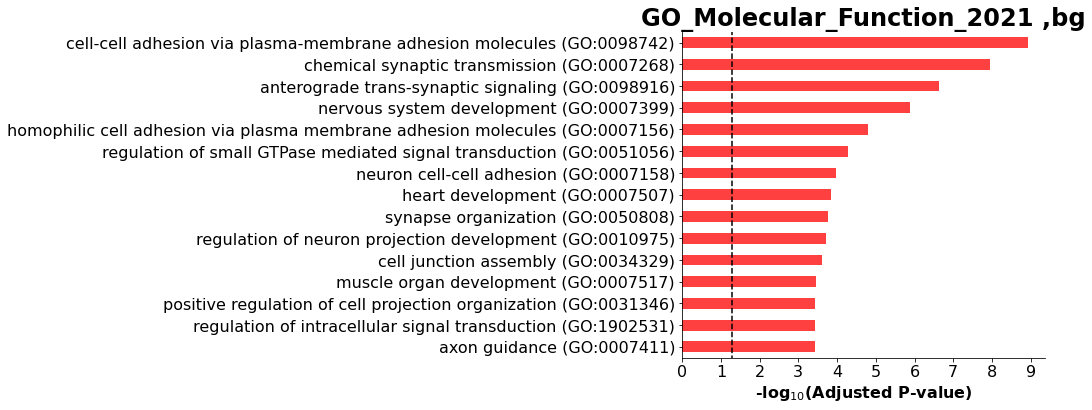

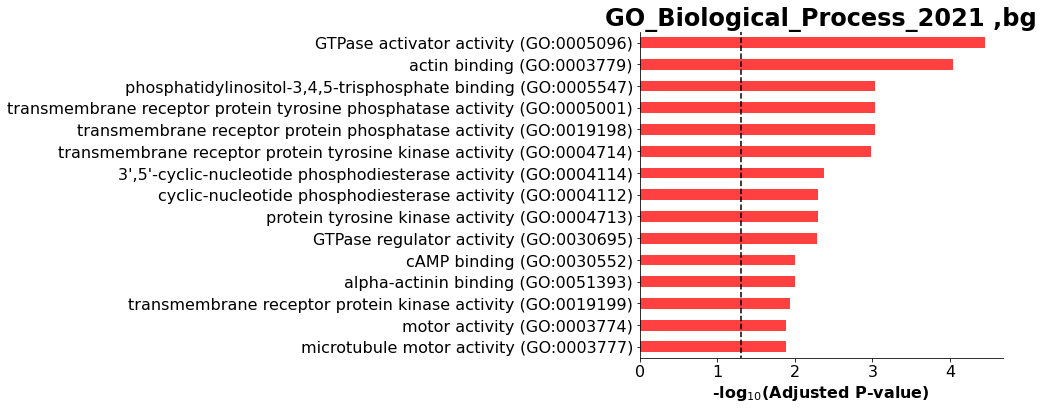

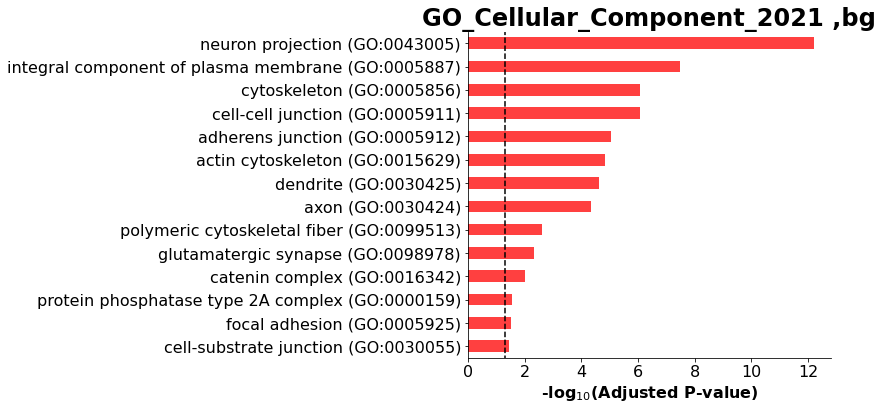

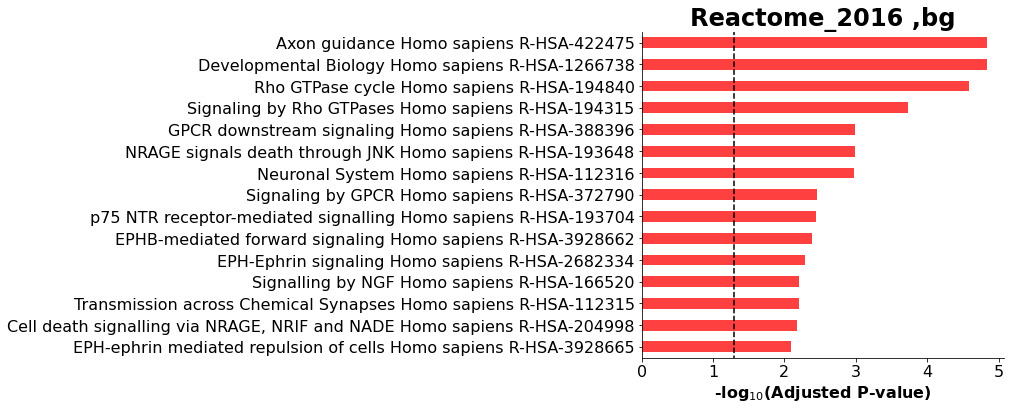

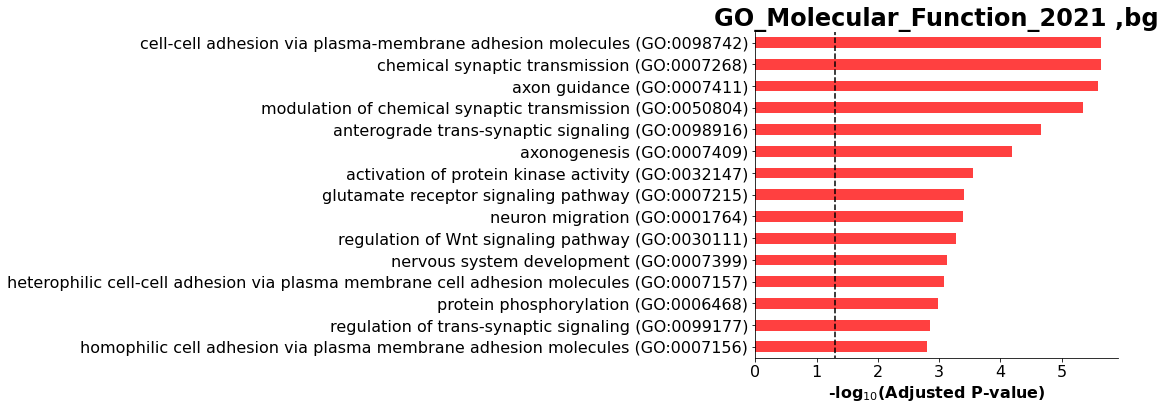

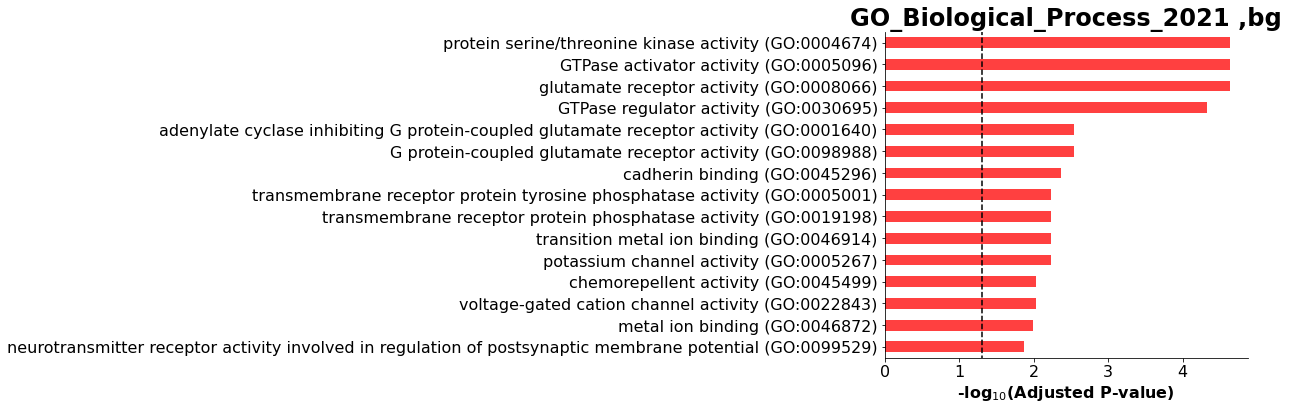

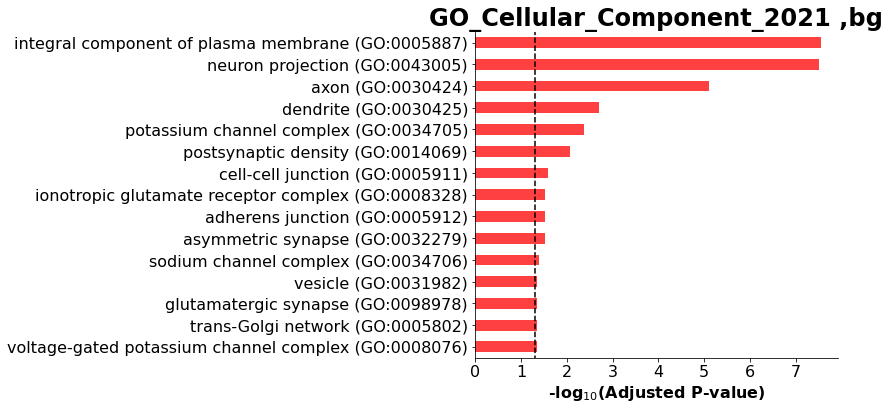

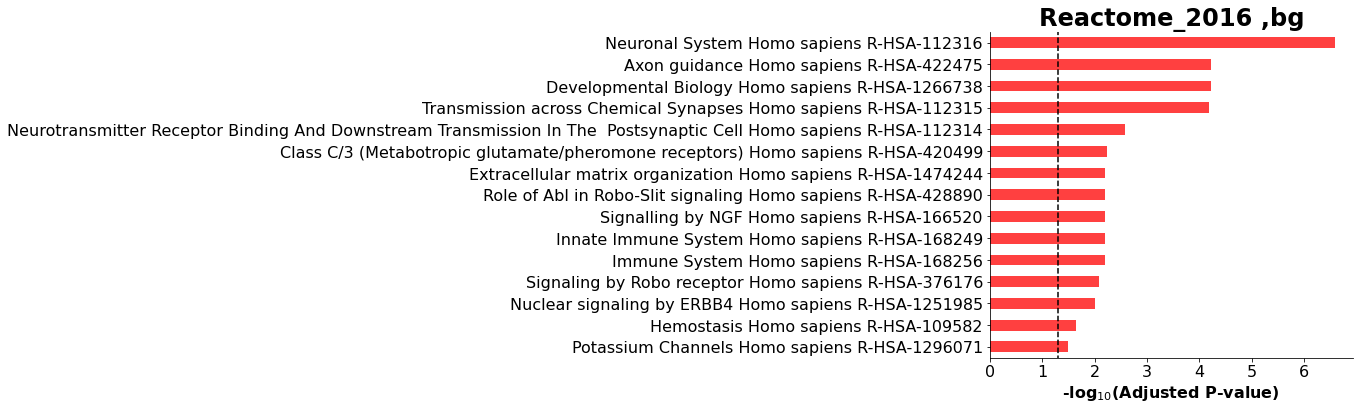

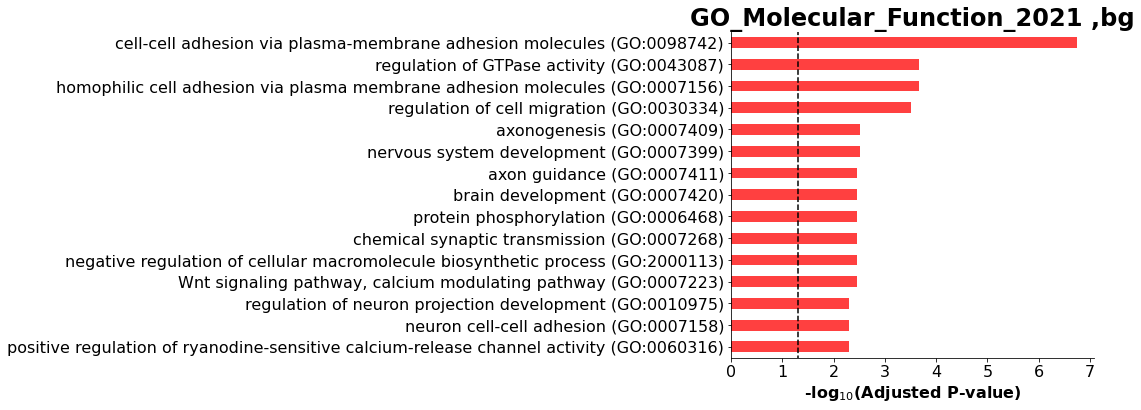

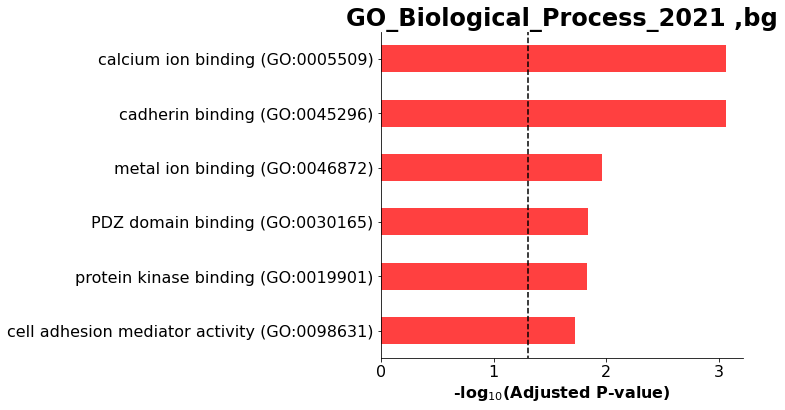

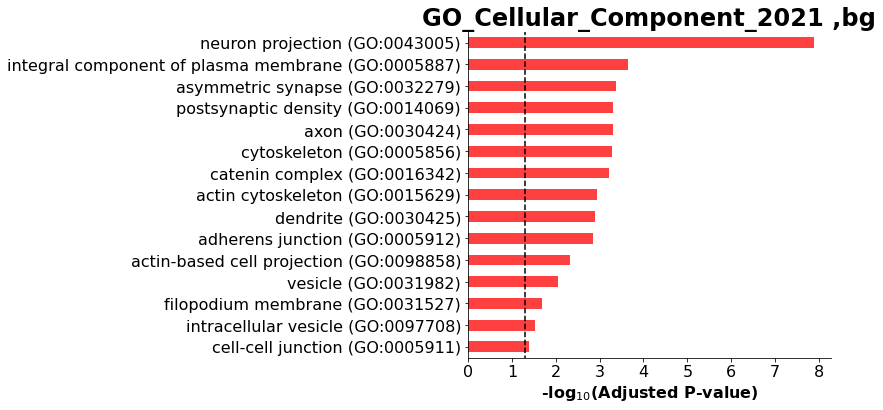

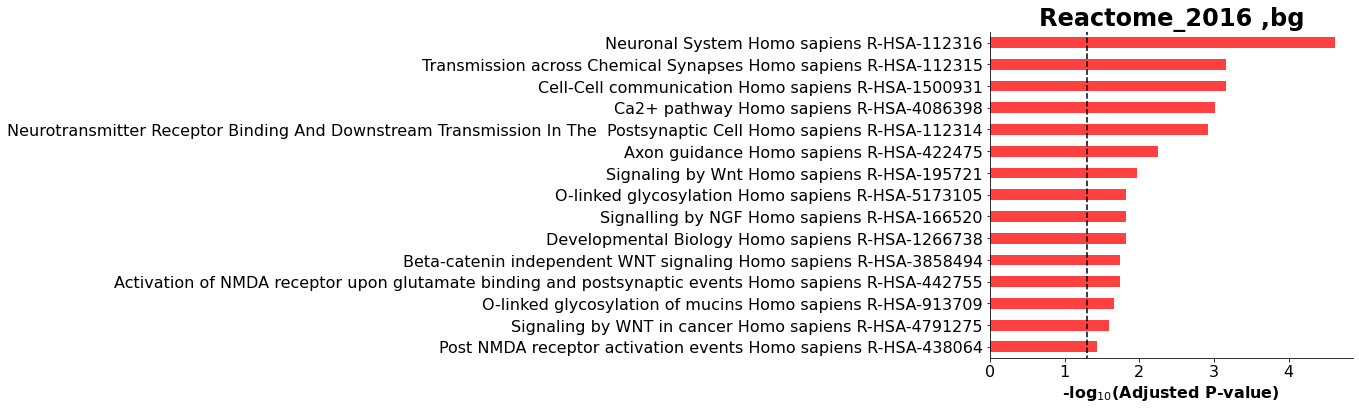

In [23]:
genelists = []
cons_in_table = ['cons','inno','non_inno']
table_names = ['two_alleles.tsv', 'fixed_inno.tsv', 'fixed_noninno.tsv']

df2 = pd.read_csv(f'{path_to_data}stage3/two_alleles.tsv', sep = '\t')

df2['start'] = df2['start']+1 
all_tabels = []
all_dfs = []
for i in range(3):
    print(cons_in_table[i])

    df2 = pd.read_csv(f'{path_to_data}stage3/{table_names[i]}', sep = '\t')
    
    print(f'number of positions:  {df2.shape[0]}')

    df2['start'] = df2['start']+1 
    
    df3 = df2[(((df2['n_inno']>=4)&(df2['n_noninno']>=4)) |
              (((df2['n_inno']==3)&(df2['n_noninno']==4))&((df2['inno_N']==1)|(df2['inno_-']==1)))|
             (((df2['n_noninno']==3)&(df2['n_inno']==4))&((df2['noninno_N']==1)|(df2['noninno_-']==1))))
              &(df2[cons_in_table[i]]==True)]

    all_dfs.append(df3)
    matched_list = []

    for chrom in df3['chrom'].unique():
        df3_chrom = df3[df3['chrom']== chrom]
        df_chrom = df[df['chrom']==chrom]

        for idx in df3_chrom.index:
            df_small = df_chrom[(df_chrom['start']<=df3_chrom.loc[idx]['start'])
                                         &(df_chrom['end']>=df3_chrom.loc[idx]['start'])]
            df_small['coord'] = int(df3_chrom.loc[idx]['start'])
            df_small['coord'] = df_small['coord']+1
            df_small['type'] = cons_in_table[i]
            matched_list.append(df_small)
    df_genes = pd.concat(matched_list)

    df_genes['element_ID'] = df_genes['attributes'].apply(lambda x: x.split(';')[0].split('=')[1].split('-')[1])
    df_genes.head()

    genelist = list(set(df_genes['element_ID'].to_list()))
    genelists.append(set(genelist))
    print(len(genelist))
    all_tabels.append(df_genes)

    l = -np.log10(0.05)



    plot(get_df(go_BP, genelist, background), 'bg', 'GO_Molecular_Function_2021')
    plot(get_df(go_MF, genelist, background), 'bg', 'GO_Biological_Process_2021')
    plot(get_df(go_CC, genelist, background), 'bg', 'GO_Cellular_Component_2021')
    plot(get_df(go_reactome, genelist, background), 'bg', 'Reactome_2016')

relult_df = pd.concat(all_tabels)
all_df = pd.concat(all_dfs)
all_df['coord']=all_df['start']+1

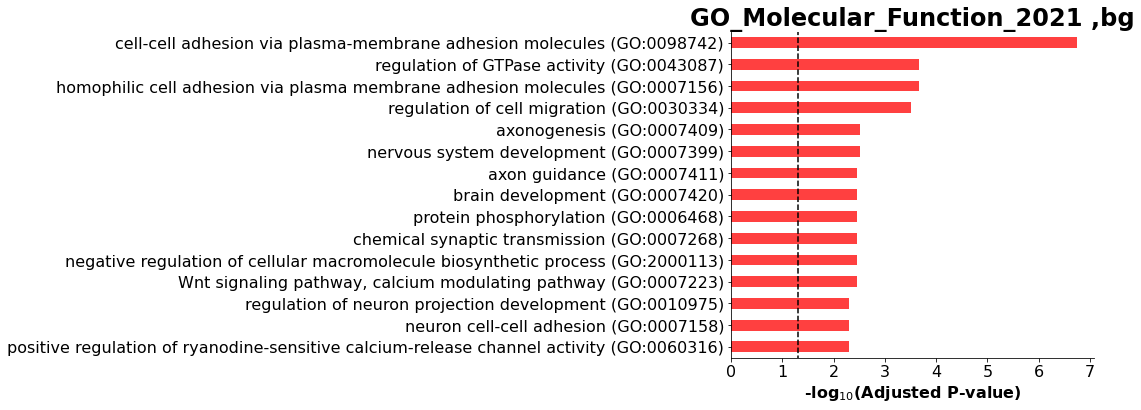

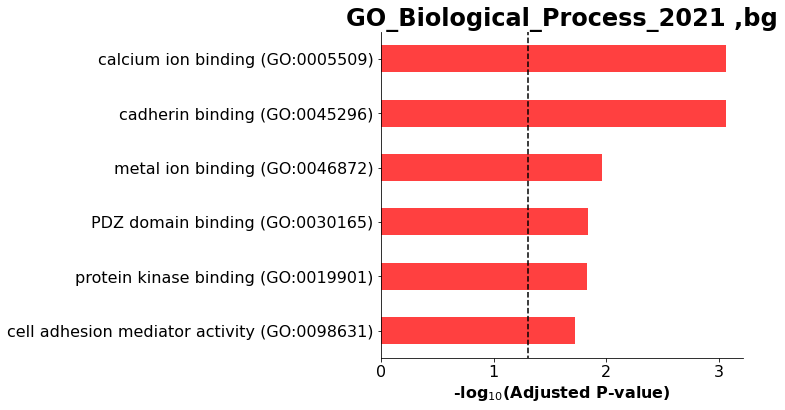

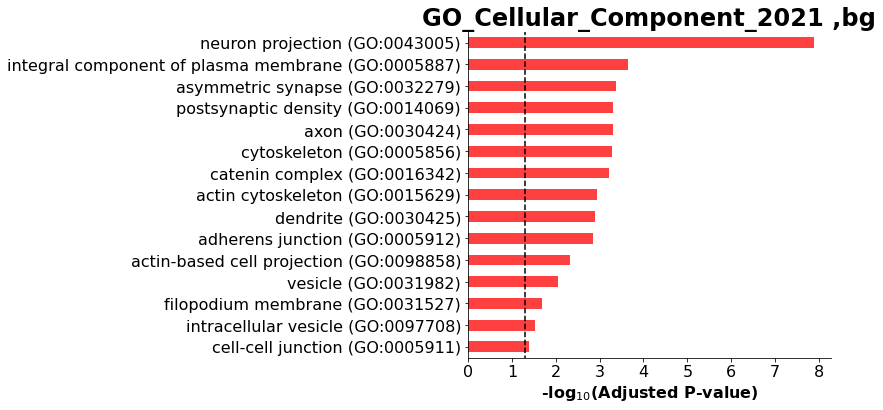

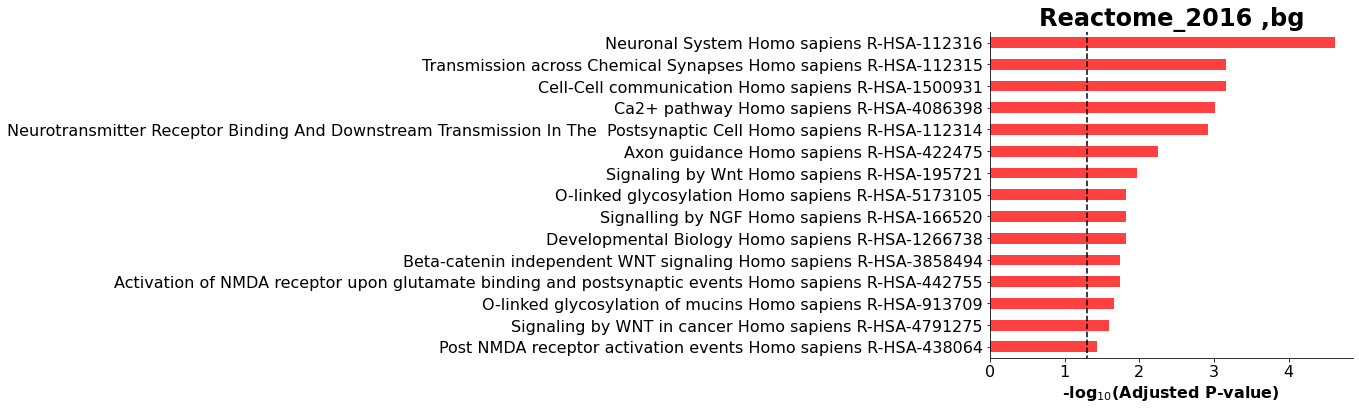

In [33]:
genelists_all = list(genelists[0]&genelists[1]&genelists[2])
plot(get_df(go_BP, genelist, background), 'bg', 'GO_Molecular_Function_2021')
plot(get_df(go_MF, genelist, background), 'bg', 'GO_Biological_Process_2021')
plot(get_df(go_CC, genelist, background), 'bg', 'GO_Cellular_Component_2021')
plot(get_df(go_reactome, genelist, background), 'bg', 'Reactome_2016')